# XGBoost Lasso
## Feature Engineeringは甘め
## score=0.33726

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.pyplot inline
pd.options.display.max_columns = None

UsageError: Line magic function `%matplotlib.pyplot` not found.


In [79]:
train=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')

In [80]:
train.head(10)
# .loc(index,"column")
all_data=pd.concat([train.loc[:,'MSSubClass':'SalePrice'],test.loc[:,'MSSubClass':'SaleCondition']])

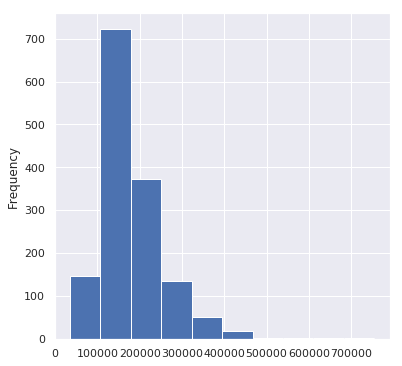

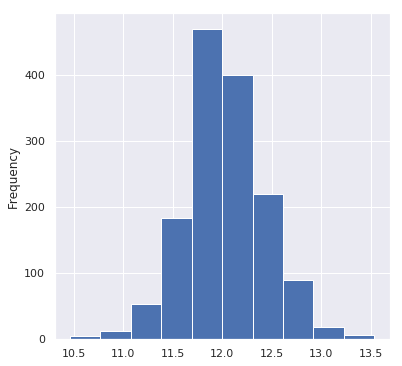

In [81]:
# 対数正規分布に乗っていることの確認

sns.set()
train['SalePrice'].plot.hist()

fig,ax=plt.subplots()
np.log1p(train['SalePrice']).plot.hist()

In [82]:
train['SalePrice']=np.log1p(train['SalePrice'])

# 数字カラムの取得 indexがカラム名　データが型のDataFrameを返す
numeric_features=all_data.dtypes[all_data.dtypes !='object']
print(numeric_features)

# indexのカラム名のみ取得
numeric_features=numeric_features.index
print(numeric_features)

# 数字データの歪度を取得
from scipy.stats import skew

all_data_skewed=all_data[numeric_features].apply(lambda x:skew(x.dropna()))
print(all_data_skewed)

# 歪度が0.75より大きい特徴のカラム名と歪度のDataFrameを取得
skewed_feats=all_data_skewed[all_data_skewed>0.75]
print(skewed_feats)
skewed_feats=skewed_feats.index
print(skewed_feats)

all_data[skewed_featse]=np.log1p(all_data[skewed_featse])

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtUnfSF        float64
EnclosedPorch      int64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars       float64
GarageYrBlt      float64
GrLivArea          int64
HalfBath           int64
KitchenAbvGr       int64
LotArea            int64
LotFrontage      float64
LowQualFinSF       int64
MSSubClass         int64
MasVnrArea       float64
MiscVal            int64
MoSold             int64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
PoolArea           int64
SalePrice        float64
ScreenPorch        int64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF         int64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
dtype: object
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', '

NameError: name 'skewed_featse' is not defined

<Figure size 1080x1080 with 0 Axes>

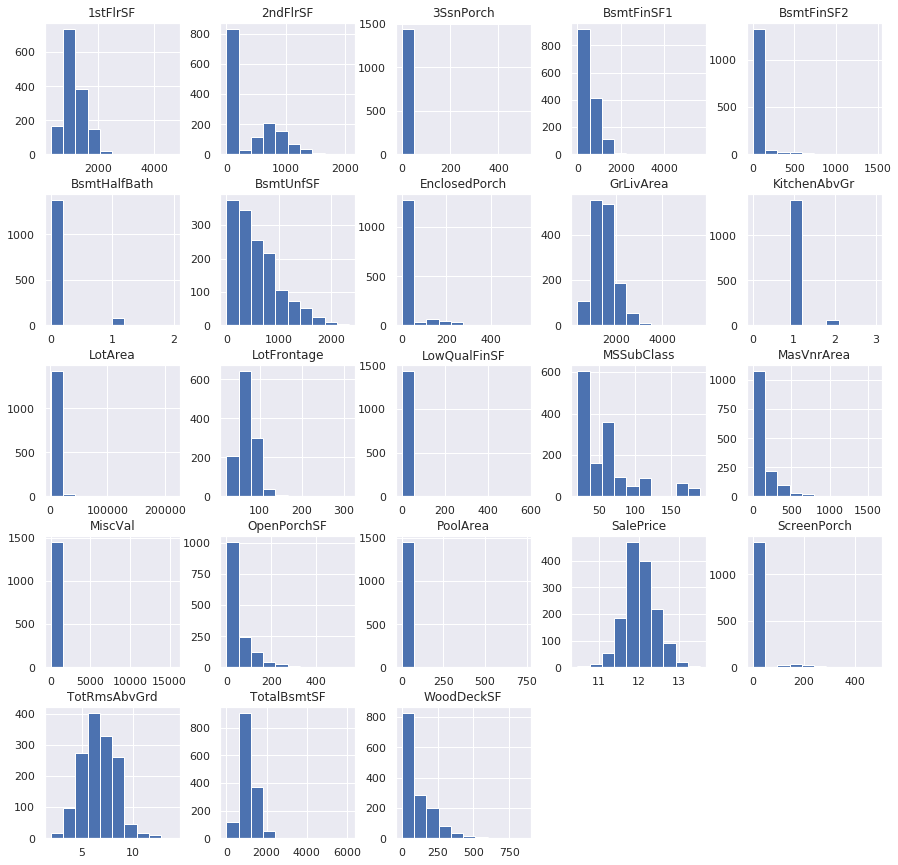

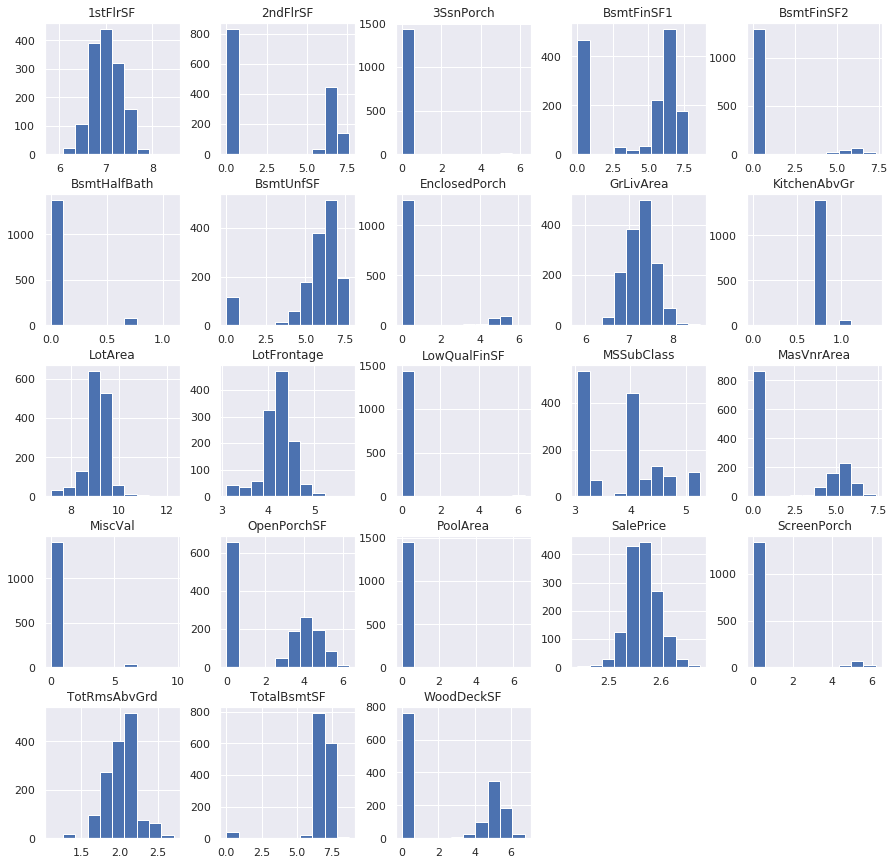

In [83]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
# グラフが重ならないようにする
plt.tight_layout()
# logを取る前のヒストグラム
train[skewed_feats].hist()
plt.show()

#　対数変換後のヒストグラム
np.log1p(train[skewed_feats]).hist()
plt.show()


In [84]:
all_data=pd.get_dummies(all_data)
all_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0
5,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,0,0,0,0,0,1,0,1,1,0
6,1694,0,0,3,1369.0,0.0,1.0,0.0,317.0,0,...,0,0,0,0,0,1,0,1,1,0
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,0,0,0,0,0,1,0,1,1,0
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,0,0,0,0,0,1,0,1,1,0
9,1077,0,0,2,851.0,0.0,1.0,0.0,140.0,0,...,0,0,0,0,0,1,0,1,1,0


In [85]:
# 欠損値にカラムの平均を入れる。平均値補完
all_data=all_data.fillna(all_data.mean())
all_data.isnull().any()

1stFlrSF                 False
2ndFlrSF                 False
3SsnPorch                False
BedroomAbvGr             False
BsmtFinSF1               False
BsmtFinSF2               False
BsmtFullBath             False
BsmtHalfBath             False
BsmtUnfSF                False
EnclosedPorch            False
Fireplaces               False
FullBath                 False
GarageArea               False
GarageCars               False
GarageYrBlt              False
GrLivArea                False
HalfBath                 False
KitchenAbvGr             False
LotArea                  False
LotFrontage              False
LowQualFinSF             False
MSSubClass               False
MasVnrArea               False
MiscVal                  False
MoSold                   False
OpenPorchSF              False
OverallCond              False
OverallQual              False
PoolArea                 False
SalePrice                False
                         ...  
RoofMatl_Metal           False
RoofMatl

In [86]:
X_train=all_data[:train.shape[0]]
X_test=all_data[train.shape[0]:]
y_train=train['SalePrice']

In [15]:
from sklearn.linear_model import Ridge,RidgeCV,ElasticNet,LassoCV,LassoLarsCV
from sklearn.model_selection import cross_val_score

# 交差検証での値のRMSEを返す関数
def rmse_cv(model):
    rmse=np.sqrt(-cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv=5))
    return(rmse)


In [16]:
model_ridge=Ridge()

alphas= [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

# 5交差検証をしているので、5つのRMSEの値がかえされる
cv_ridge=[rmse_cv(Ridge(alpha=alpha)) for alpha in alphas]
print(cv_ridge)

# 各 alphaの値でのRMSEの平均値
cv_ridge=[cv.mean() for cv in cv_ridge]
print(cv_ridge)

[array([0.09368717, 0.09600823, 0.10183655, 0.08117374, 0.09152805]), array([0.09217195, 0.0945253 , 0.10048368, 0.08106689, 0.09116555]), array([0.08826392, 0.09122103, 0.09715091, 0.08069919, 0.09023214]), array([0.08194568, 0.0873556 , 0.09290635, 0.08014705, 0.08907057]), array([0.07658115, 0.08503366, 0.09057796, 0.08013308, 0.08880201]), array([0.07507672, 0.08462432, 0.09016209, 0.08043521, 0.0890981 ]), array([0.0741446 , 0.08478586, 0.09004541, 0.08103947, 0.08984758]), array([0.07400459, 0.08522699, 0.09014304, 0.08141432, 0.09041437]), array([0.07407237, 0.08648863, 0.09060659, 0.08205365, 0.09159213]), array([0.07426005, 0.0877804 , 0.09127847, 0.08262688, 0.09273859]), array([0.07453501, 0.08901036, 0.09208079, 0.08325613, 0.09392849])]
[0.0928467474568747, 0.0918826732579224, 0.08951343771123658, 0.08628505017660923, 0.08422557490860658, 0.08387928782210839, 0.08397258269395207, 0.0842406623562805, 0.08496267179511563, 0.08573687803039076, 0.08656215426011568]


0.05     0.092847
0.10     0.091883
0.30     0.089513
1.00     0.086285
3.00     0.084226
5.00     0.083879
10.00    0.083973
15.00    0.084241
30.00    0.084963
50.00    0.085737
75.00    0.086562
dtype: float64


0.08387928782210839

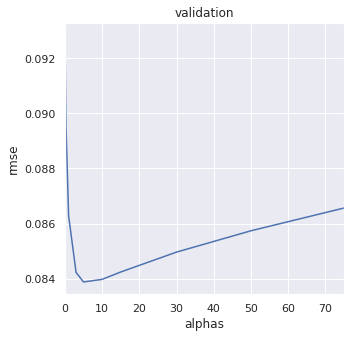

In [17]:
cv_ridge=pd.Series(cv_ridge,index=alphas)
print(cv_ridge)
plt.figure(figsize=(5,5))
cv_ridge.plot(title='validation')
plt.xlabel('alphas')
plt.ylabel('rmse')

cv_ridge.min()

# LassoCV
交差検証によって最適なパラメーターを求めるために、機能が多く備わったLasso
使われているアルゴリズムは同じ

In [18]:
import warnings
warnings.filterwarnings('ignore')
model_lasso = LassoCV(alphas= [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
print(model_lasso)
# 5交差検証の値が返されるが、どのハイパーパラメータでの値なのだろうか
rmse_lasso=rmse_cv(model_lasso)
print(rmse_lasso)
rmse_lasso=rmse_lasso.mean()
print(rmse_lasso)


LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv='warn', eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
[0.07317993 0.08624814 0.09022081 0.07854323 0.09140846]
0.08392011356159539


In [19]:
coef=pd.Series(model_lasso.coef_,index=X_train.columns)
coef.head(10)
print("Lasso picked " + str(sum(coef !=0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 102 variables and eliminated the other 187 variables


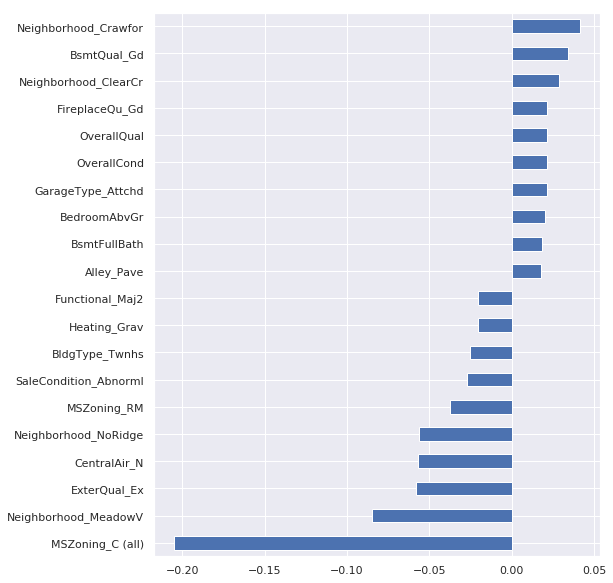

In [20]:
#分類に重要な特徴量を確認する

imp_coef=pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

plt.rcParams['figure.figsize']=(8,10)
# barh 横棒
imp_coef.plot(kind="barh")



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


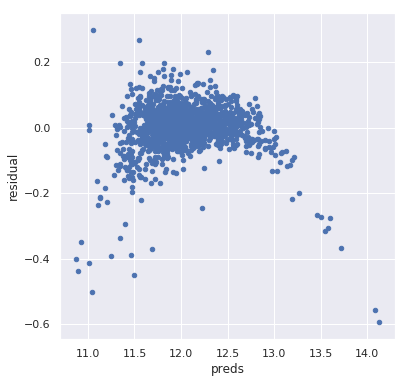

<Figure size 432x432 with 0 Axes>

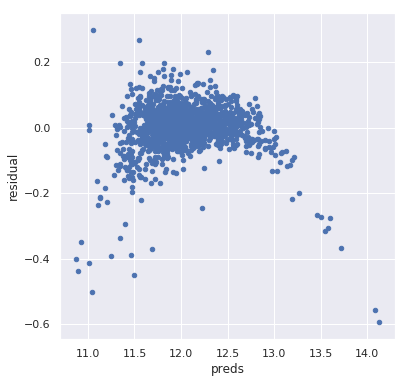

In [21]:
plt.rcParams['figure.figsize']=(6,6)

preds=pd.DataFrame({"preds":model_lasso.predict(X_train),"true":y_train})

preds["residual"]=preds["true"]-preds['preds']

preds.plot(x='preds',y="residual",kind="scatter")

# 別のpandasでの描き方
fig=plt.figure()

preds.plot.scatter(x='preds',y="residual")

## XGBoost

In [34]:
import xgboost as xgb

# XGBoostが扱うデータ形式にする
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

print(dtrain.feature_names[:5])
print(dtrain.feature_types[:5])

# "max_depth":木の深さ上限,"eta":各ステップの学習率
# 学習を記録
params={"max_depth":2,"eta":0.1}
# DataFrame型でrmseの値を返す
model=xgb.cv(params,dtrain,num_boost_round=500,early_stopping_rounds=100)

print(type(model[:5]))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1']
['int', 'int', 'int', 'int', 'float']
<class 'pandas.core.frame.DataFrame'>


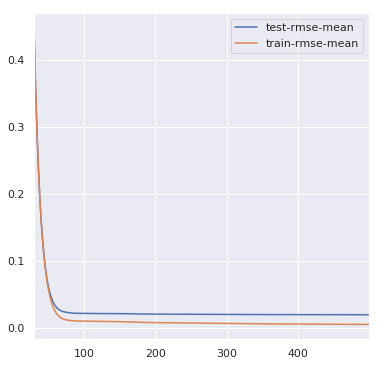

In [40]:
model.columns
model.loc[30:,["test-rmse-mean","train-rmse-mean"]].plot()

In [44]:
# 普通にモデルを作成して学習させる。回帰問題なのでRegressor
model_xgb=xgb.XGBRegressor(n_estimators=360,max_depth=2,learning_rate=0.1)
model_xgb.fit(X_train,y_train)

xgb_preds=np.expm1(model_xgb.predict(X_test))
lasso_preds=np.expm1(model_lasso.predict(X_test))

[12:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


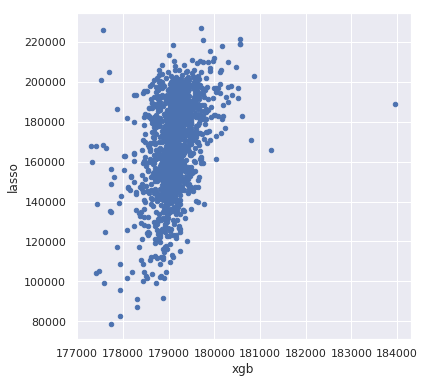

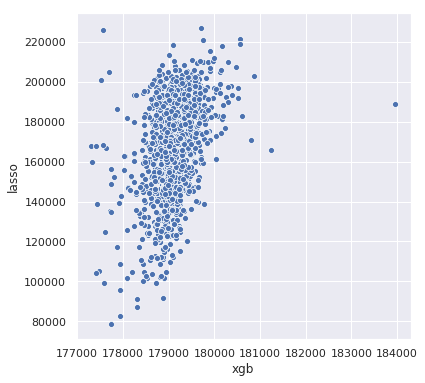

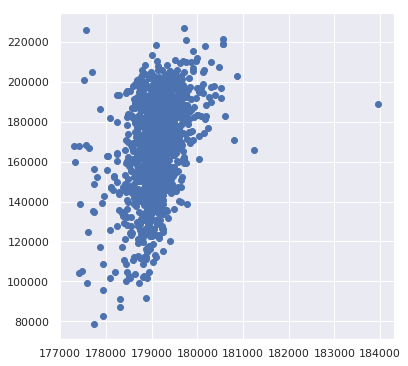

In [51]:
# xgb lassoの予測値の差を可視化

# pandasで表示
predictions=pd.DataFrame({"xgb":xgb_preds,"lasso":lasso_preds})
predictions.plot(x="xgb",y="lasso",kind="scatter")

# seabornで表示
fig=plt.figure()
sns.scatterplot(x="xgb",y="lasso",data=predictions)

fig=plt.figure()
plt.scatter(x="xgb",y="lasso",data=predictions)

In [62]:
model_xgb=xgb.XGBRegressor(n_estimators=360,max_depth=2,learning_rate=0.1)
rmse_xgb=rmse_cv(model_xgb).mean()
print(rmse_xgb)

#print("rmse_xgb:{.4f},rmse_lasso:{.4f}".format(rmse_lasso,rmse_xgb))


[12:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.010684549268066812


In [63]:
preds=0.3*lasso_preds+0.7*xgb_preds

In [53]:
sub=pd.DataFrame({"Id":test.Id,"SalePrice":preds})
sub.to_csv("linear_submission.csv",index=False)

In [64]:
preds=xgb_preds
sub=pd.DataFrame({"Id":test.Id,"SalePrice":preds})
sub.to_csv("linear_submission_xgb=1.csv",index=False)

In [65]:
preds=lasso_preds
sub=pd.DataFrame({"Id":test.Id,"SalePrice":preds})
sub.to_csv("linear_submission_lasso=1.csv",index=False)

# kerasでNN
## 精度はよくない

In [66]:
from keras import layers
from keras import models
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [89]:
# データ標準化 mean=0,std=1
X_train=StandardScaler().fit_transform(X_train)
x_tr,x_val,y_tr,y_val=train_test_split(X_train,y_train,random_state=3)

print(x_tr.shape)
pd.DataFrame(X_train).describe()

(1095, 289)


,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,6.509253e-17,-1.825024e-17,4.866731e-18,2.141362e-16,-2.433366e-17,-3.406712e-17,2.311697e-17,2.433366e-17,-6.600504e-17,-2.311697e-17,...,1.216683e-18,-2.920039e-17,-4.136721e-17,-4.380058e-17,9.733462e-18,1.301851e-16,-2.190029e-17,5.961746e-16,9.611794e-16,1.460019e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-2.144172e+00,-7.951632e-01,-1.163393e-01,-3.514952e+00,-9.730182e-01,-2.886528e-01,-8.199644e-01,-2.410610e-01,-1.284176e+00,-3.593249e-01,...,-7.875671e-02,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,-2.562180e+00,-6.423821e-02,-1.556706e+01,-3.819686e+01,-2.618016e-02
25%,-7.261556e-01,-7.951632e-01,-1.163393e-01,-1.062465e+00,-9.730182e-01,-2.886528e-01,-8.199644e-01,-2.410610e-01,-7.793259e-01,-3.593249e-01,...,-7.875671e-02,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-6.423821e-02,6.423821e-02,2.618016e-02,-2.618016e-02
50%,-1.956933e-01,-7.951632e-01,-1.163393e-01,1.637791e-01,-1.319022e-01,-2.886528e-01,-8.199644e-01,-2.410610e-01,-2.031633e-01,-3.593249e-01,...,-7.875671e-02,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-6.423821e-02,6.423821e-02,2.618016e-02,-2.618016e-02
75%,5.915905e-01,8.731117e-01,-1.163393e-01,1.637791e-01,5.891327e-01,-2.886528e-01,1.107810e+00,-2.410610e-01,5.450557e-01,-3.593249e-01,...,-7.875671e-02,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-6.423821e-02,6.423821e-02,2.618016e-02,-2.618016e-02
max,9.132681e+00,3.936963e+00,1.721723e+01,6.294997e+00,1.140575e+01,8.851638e+00,4.963359e+00,8.138680e+00,4.004295e+00,8.675309e+00,...,1.269733e+01,1.705872e+01,1.705872e+01,3.311678e+00,2.203785e+01,3.902926e-01,1.556706e+01,6.423821e-02,2.618016e-02,3.819686e+01


In [106]:
model=models.Sequential()

model.add(layers.Dense(1,input_dim=X_train.shape[1],activity_regularizer=regularizers.l1(0.001)))
model.compile(loss="mse",optimizer="adam")

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 290       
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


In [108]:
history=model.fit(x_tr,y_tr,epochs=10,validation_data=(x_val,y_val))

Train on 1095 samples, validate on 365 samples
Epoch 1/10
1095/1095 [==============================] - 0s 132us/step - loss: 146.9356 - val_loss: 146.1352
Epoch 2/10
1095/1095 [==============================] - 0s 42us/step - loss: 144.9554 - val_loss: 147.0677
Epoch 3/10
1095/1095 [==============================] - 0s 41us/step - loss: 143.4363 - val_loss: 148.2109
Epoch 4/10
1095/1095 [==============================] - 0s 41us/step - loss: 141.8811 - val_loss: 149.3948
Epoch 5/10
1095/1095 [==============================] - 0s 38us/step - loss: 140.4877 - val_loss: 150.7286
Epoch 6/10
1095/1095 [==============================] - 0s 41us/step - loss: 139.0895 - val_loss: 152.1395
Epoch 7/10
1095/1095 [==============================] - 0s 38us/step - loss: 137.7800 - val_loss: 153.7145
Epoch 8/10
1095/1095 [==============================] - 0s 40us/step - loss: 136.4011 - val_loss: 155.1699
Epoch 9/10
1095/1095 [==============================] - 0s 42us/step - loss: 135.0860 - val_loss

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


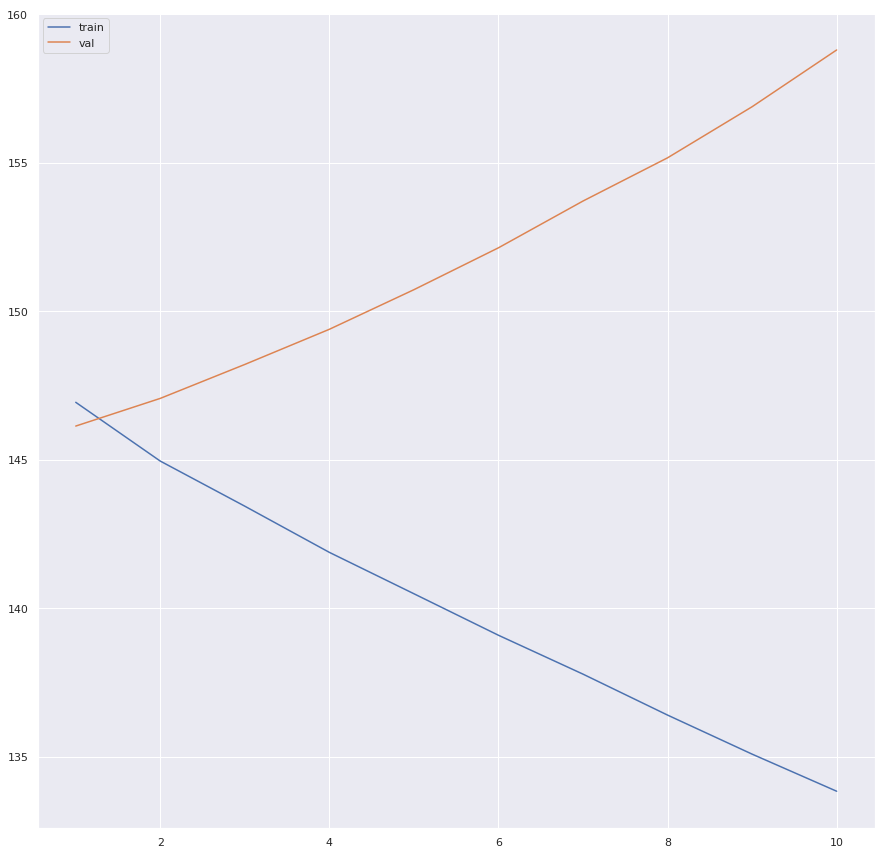

In [119]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=[i for i in range(1,11)]

print(epochs)
plt.plot(epochs,train_loss,label='train')
plt.plot(epochs,val_loss,label='val')

plt.legend()
plt.show()

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x7f627c39ea90>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.